In [75]:
#import the file and important packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from numpy import linalg as LA
from sklearn.experimental import (
    enable_iterative_imputer,
)
from statsmodels.distributions.empirical_distribution  import ECDF
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123

import pandas as pd
data = pd.read_excel("M4_Data.xls",na_values='?')

#display the dataset
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [31]:
#Check the types of data, check what are categorical variables, what are numeric variables 
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression          float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg           object
price                float64
dtype: object

In [32]:
#Check the data shape
print(data.shape)
data.head(5)

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [33]:
#Do a descriptive statistics check on data
data_desc = data.describe()
data_desc

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression,horsepower,peak-rpm,city-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,45400.000000


In [35]:
#Check whether there are mistakes and omissions on categorical variables.
classes = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

for each in classes:
    print(each + ':\n')
    print(list(data[each].drop_duplicates()))
    print('\n')

make:

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']


fuel-type:

['gas', 'diesel']


aspiration:

['std', 'turbo']


num-of-doors:

['two', 'four', nan]


body-style:

['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']


drive-wheels:

['rwd', 'fwd', '4wd']


engine-location:

['front', 'rear']


engine-type:

['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']


num-of-cylinders:

['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']


fuel-system:

['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']




In [36]:
#Dealing with missing values,see how many missing values different attributes have
null_cols = ['normalized-losses','num-of-doors','bore','stroke','horsepower','peak-rpm','price']
total_rows = data.shape[0]
for each_col in null_cols:
    print('{}:{}'.format(each_col,data[pd.isnull(data[each_col])].shape[0]/total_rows))

normalized-losses:0.2
num-of-doors:0.00975609756097561
bore:0.01951219512195122
stroke:0.01951219512195122
horsepower:0.00975609756097561
peak-rpm:0.00975609756097561
price:0.01951219512195122


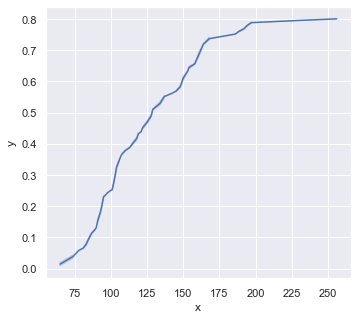

In [37]:
#Check distribution of normalized-losses
sns.set(style = 'darkgrid')
plt.figure(figsize = (12,5))
plt.subplot(121)
#cumulative distribution curve
cdf = ECDF(data['normalized-losses'])
cdf = [[each_x,each_y] for each_x, each_y in zip(cdf.x,cdf.y)]
cdf = pd.DataFrame(cdf,columns=['x','y'])
sns.lineplot(x='x',y='y',data=cdf)

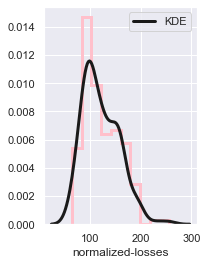

In [38]:
#histogram
#We could see 80% in "normalized-losses" is lower than 200
plt.subplot(122)
x = data['normalized-losses'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

In [39]:
#Group by symboling, we could see the data is pretty stratified.
data.groupby('symboling')['normalized-losses'].describe()

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.00,103.0,103.0,103.0
-1,20.0,85.600000,18.528499,65.0,71.75,91.5,95.0,137.0
0,48.0,113.166667,32.510773,77.0,91.00,102.0,120.5,192.0
1,47.0,128.574468,28.478630,74.0,105.50,125.0,148.0,231.0
2,29.0,125.689655,30.167513,83.0,94.00,134.0,137.0,192.0
3,17.0,168.647059,30.636867,142.0,150.00,150.0,194.0,256.0


In [44]:
#delete the other missing values in other columns since the number of missing values is small
sub_set = ['num-of-doors','bore','stroke','horsepower','peak-rpm','price']
data = data.dropna(subset=sub_set).reset_index(drop=True)
#fill in the missing values by mean of columns
data['normalized-losses'] = data.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(x.mean()))
print(data.shape)
data.head()

(193, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [46]:
#Check the correlation of the data
cor_matrix = data.corr()
cor_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression,horsepower,peak-rpm,city-mpg,price
symboling,1.000000,0.593658,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,-0.084835
normalized-losses,0.593658,1.000000,-0.167286,-0.038857,0.034178,-0.445925,0.085758,0.152544,0.032765,0.057834,-0.149620,0.277376,0.245497,-0.245313,0.160602
wheel-base,-0.536516,-0.167286,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,0.584951
length,-0.363194,-0.038857,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,0.695928
width,-0.247741,0.034178,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,0.754649
height,-0.517803,-0.445925,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,0.136234
curb-weight,-0.231086,0.085758,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,0.835368
engine-size,-0.068327,0.152544,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,0.888778
bore,-0.144785,0.032765,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,0.546295
stroke,-0.010884,0.057834,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,0.096007


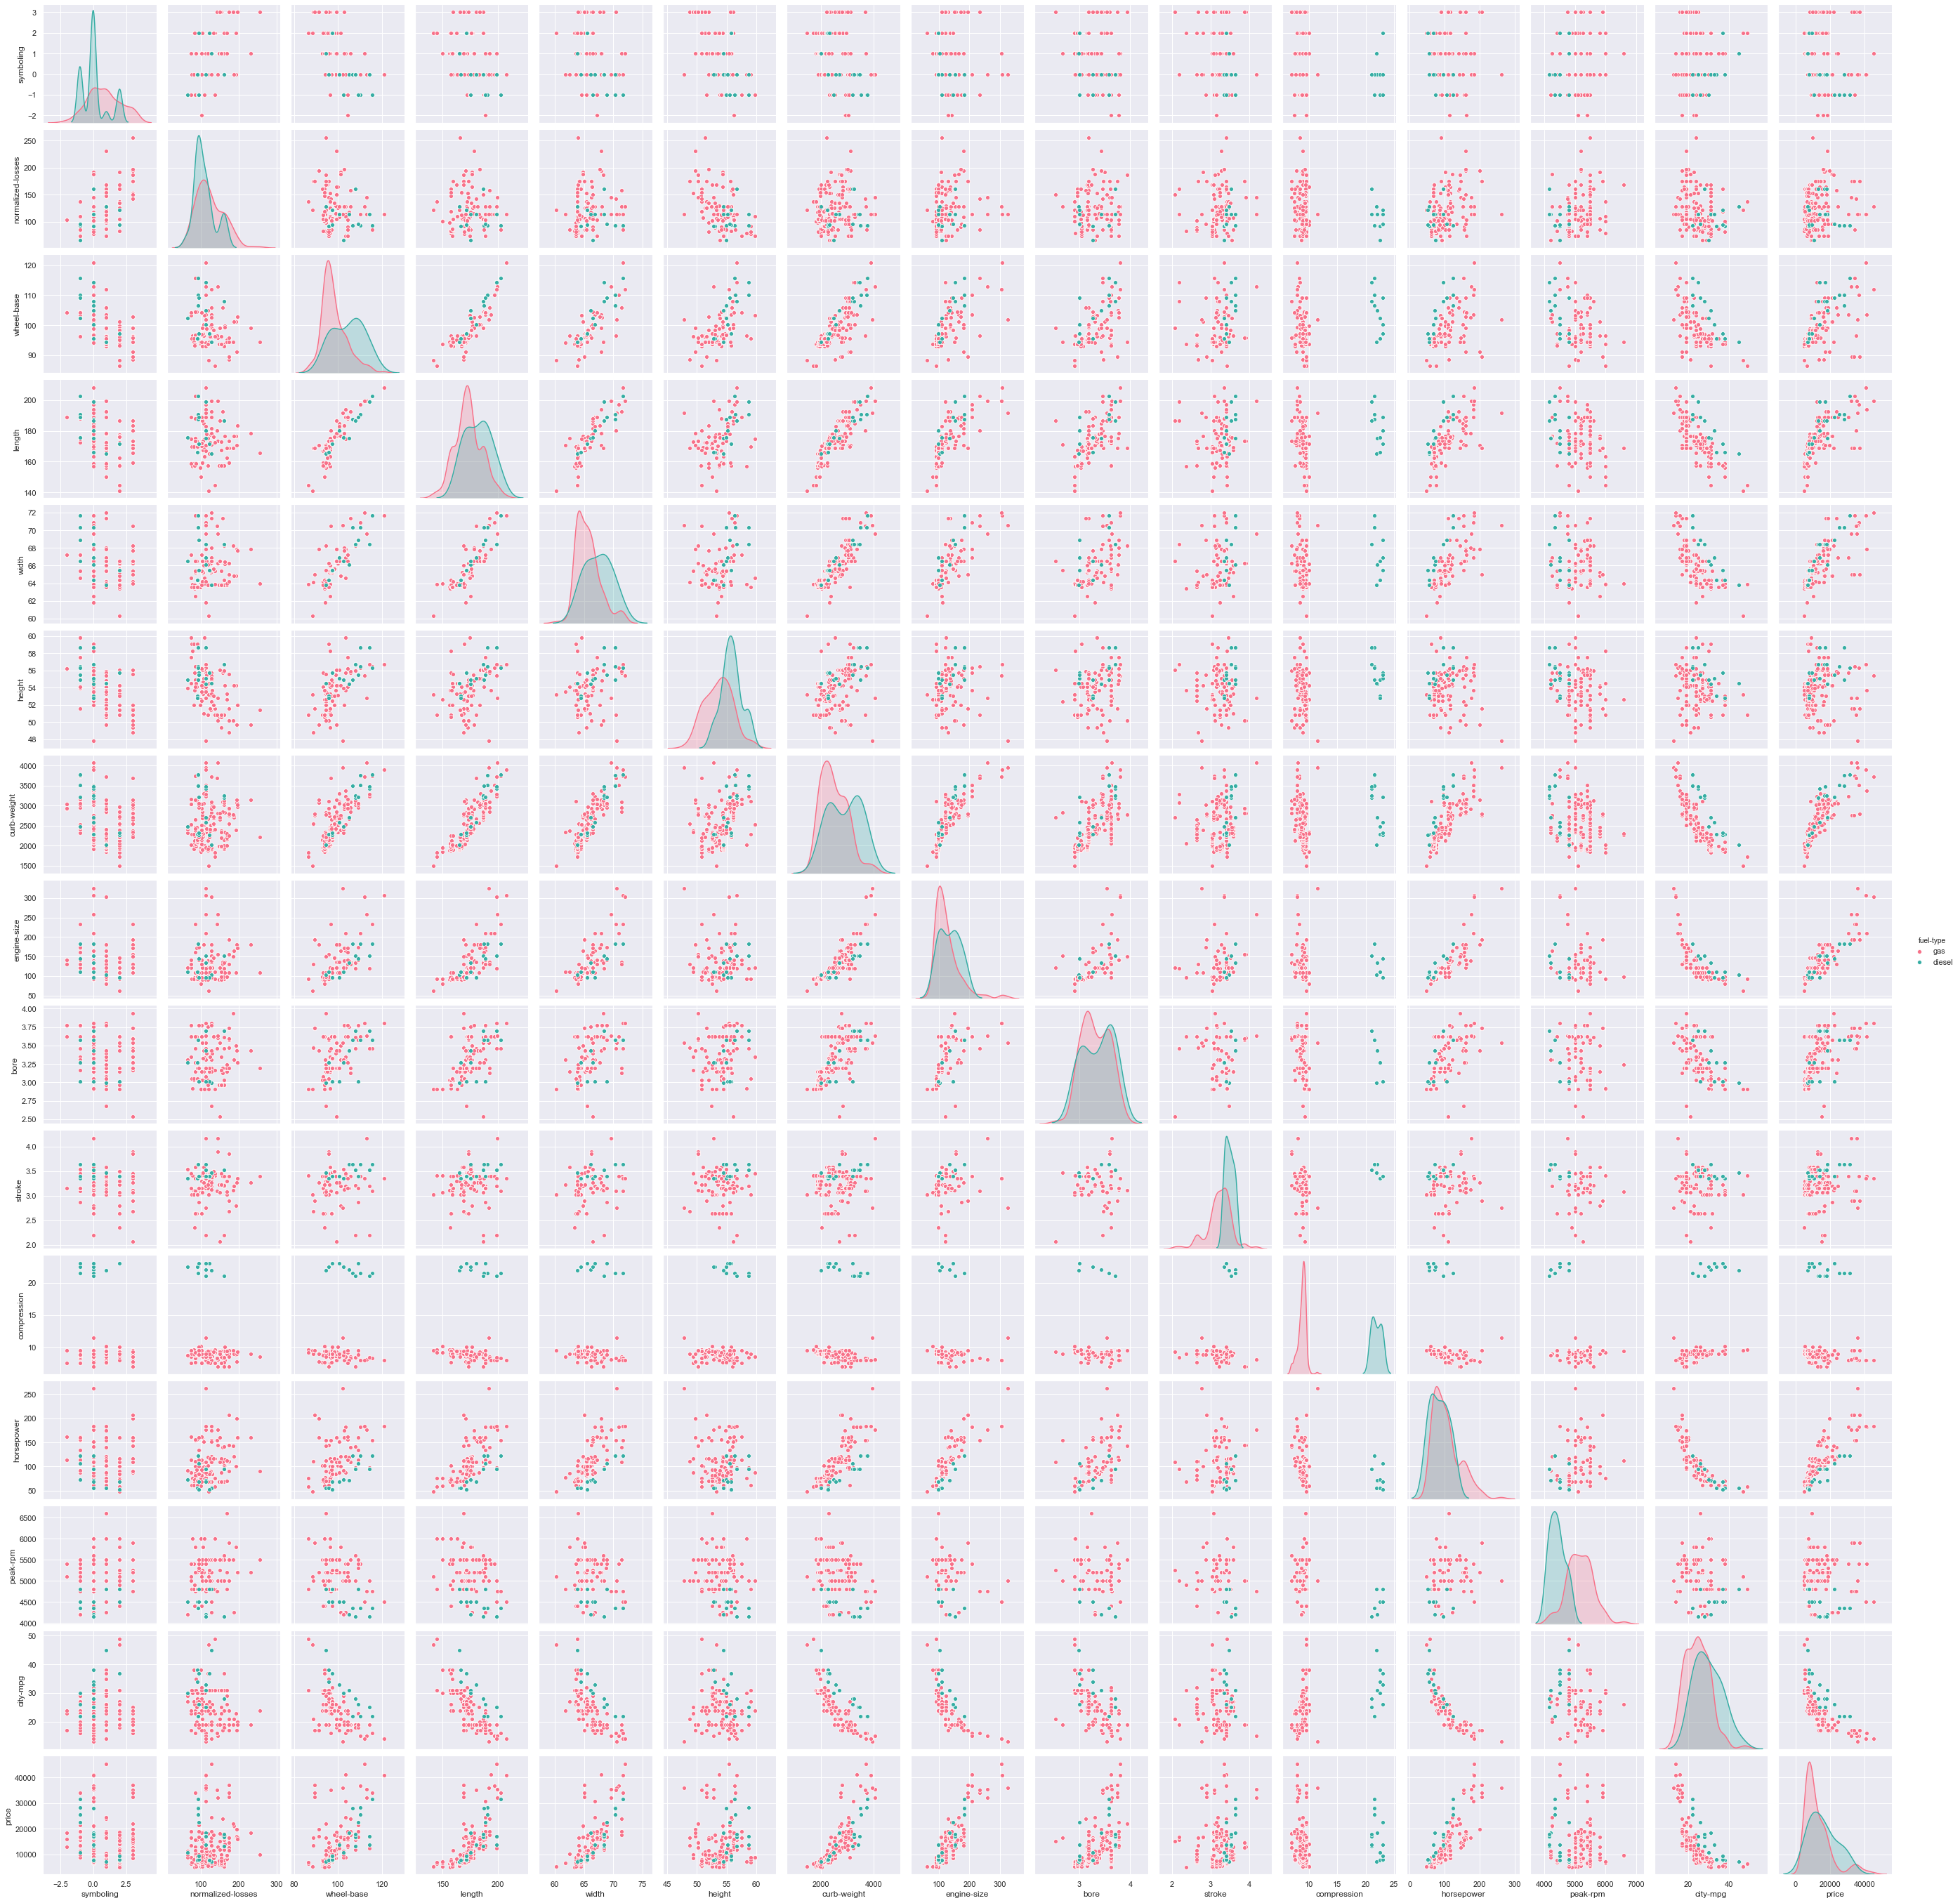

In [54]:
#Convert to one dimensional table
#np.tri is used to produce lower triangular matrix, k = -1 means offsetting one unit down, all other values set to zero above the diagonal
#T is to convert lower triangular matrix to upper triangular matrix
cor_matrix *= np.tri(*cor_matrix.values.shape, k=-1).T
cor_matrix = cor_matrix.stack()
cor_matrix = cor_matrix.reindex(cor_matrix.abs().sort_values(ascending=False).index).reset_index()
cor_matrix.columns = ["FirstVariables","SecondVariables","Correlation"]
cor_matrix.head(10)
sns.pairplot(data,hue='fuel-type',palette='husl')

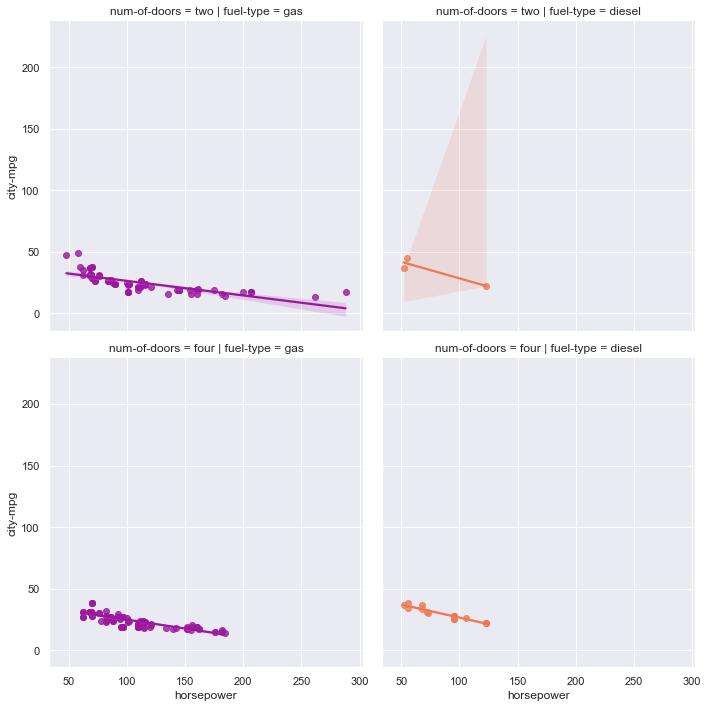

In [141]:
#Detailed analysis between some attributes
sns.lmplot(x='horsepower',y='city-mpg',data=data,hue='fuel-type',col='fuel-type',row='num-of-doors',palette='plasma',fit_reg=True)
#city-mpg has negative correlation with horsepower

In [60]:
#Define pca on data
def pca(data):
  # Data matrix data, assumes 0-centered
  n, m = data.shape
  assert np.allclose(data.mean(axis=0), np.zeros(m))
  # Compute covariance matrix
  C = np.dot(data.T, data) / (n-1)
  # Eigen decomposition
  eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Project data onto PC space
  data_pca = np.dot(data, eigen_vecs)
  return data_pca

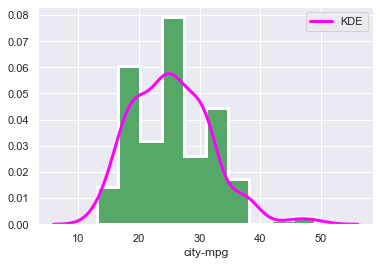

In [67]:
#Analyze whether city-mpg is normally distributed
X = data['city-mpg']
sns.distplot(X, hist = True, kde = True, kde_kws = {"color":"fuchsia","lw":3, "label":"KDE"},hist_kws = {"histtype":"stepfilled","linewidth":3,"alpha":1, "color":"g"})

In [89]:
#Data prepocessing, feature interaction
data2 = data.copy()
data2['volume']  = data2.length * data2.width * data2.height
data2.drop(['width','length','height','curb-weight','price'],axis = 1, inplace = True)
data2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,volume
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,528019.904
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,528019.904
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,587592.640
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,634816.956
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,636734.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,721961.760
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,720913.920
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,721961.760
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,721961.760


In [94]:
classes = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 
           'body-style', 'drive-wheels', 'engine-location',
           'engine-type', 'num-of-cylinders', 'fuel-system']
# Transform data into unique hot code, either 0 or 1
dummies = pd.get_dummies(features[classes])
#Add the data columns after classification processing to the list and delete the columns before processing
features3 = features.join(dummies).drop(classes, axis = 1)
print(features.columns)
features3.head()

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression', 'horsepower',
       'peak-rpm', 'highway-mpg', 'volume'],
      dtype='object')


,symboling,normalized-losses,wheel-base,engine-size,bore,stroke,compression,horsepower,peak-rpm,highway-mpg,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,NaN,88.6,130,3.47,2.68,9.0,111.0,5000.0,27,...,0,0,0,0,0,0,0,1,0,0
1,3,NaN,88.6,130,3.47,2.68,9.0,111.0,5000.0,27,...,0,0,0,0,0,0,0,1,0,0
2,1,NaN,94.5,152,2.68,3.47,9.0,154.0,5000.0,26,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,109,3.19,3.40,10.0,102.0,5500.0,30,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,136,3.19,3.40,8.0,115.0,5500.0,22,...,0,0,0,0,0,0,0,1,0,0


In [138]:
#apply train_test_split function
X = data2['city-mpg']
Y = data2['volume']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = seed)
X_train
y_train
X_test
y_test

88     581787.936
72     645726.420
114    798599.412
158    567615.160
163    567911.680
          ...    
133    696139.290
166    567911.680
41     618691.928
180    675638.670
90     574764.630
Name: volume, Length: 62, dtype: float64

In [152]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

ValueError: Expected 2D array, got 1D array instead:
array=[17 25 31 24 27 19 27 31 17 30 30 24 30 36 24 21 24 26 19 38 23 28 24 26
 19 49 37 28 19 19 30 21 26 38 28 27 26 31 24 21 19 16 24 19 19 24 14 26
 23 27 24 31 26 31 27 24 25 23 16 19 26 31 23 17 23 28 19 37 22 24 25 32
 15 18 31 21 47 21 19 17 31 17 24 17 19 20 21 19 19 22 16 28 31 31 16 19
 26 22 17 23 37 30 27 31 37 31 17 31 19 27 17 21 33 20 18 27 19 19 17 13
 22 23 29 31 17 31 19 30 38 14 15 26 19 31 17 24 19 19 15 31 31 17 19].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.